Initial EDA

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
## Data import


file_path = '/content/SeoulBikeData.csv'

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='cp1252')

print(df.head())
print(len(df))

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


So we find that for all instances where no bikes were rented out the service was not operational. We may remove the entire day or just the hourly observations where we see no bikes rented as these observations shouldn't influence our model. This is shown Below

In [27]:
#### Check for days where no bikes were taken out

no_bikes_mask = df[df['Rented Bike Count'] == 0]

print(f"There are {len(no_bikes_mask)} hours where no bikes were used")

intersect_no_bikes_and_operational = no_bikes_mask[no_bikes_mask['Functioning Day'] == 'No']

print(f"For {len(intersect_no_bikes_and_operational)} of those hours the service was not operational")

There are 295 hours where no bikes were used
For 295 of those hours the service was not operational


### Graph of daily bike usage

We create an aggregate by hours for each day to visualize how the usage changes day to day and any daily or seasonal trends of average usage.

In [48]:
#### Creating new data set with average daily bike usage per day for visualization
####     of daily bike usage for potential cycles

dailyBikeUsage = df[df['Functioning Day'] == 'Yes'].groupby('Date', sort=False)['Rented Bike Count'].sum()

print(len(dailyBikeUsage))
print(len(df)/24)

print(dailyBikeUsage)

353
365.0
Date
01/12/2017     9539
02/12/2017     8523
03/12/2017     7222
04/12/2017     8729
05/12/2017     8307
              ...  
26/11/2018    17162
27/11/2018    16282
28/11/2018    16524
29/11/2018    16423
30/11/2018    16297
Name: Rented Bike Count, Length: 353, dtype: int64


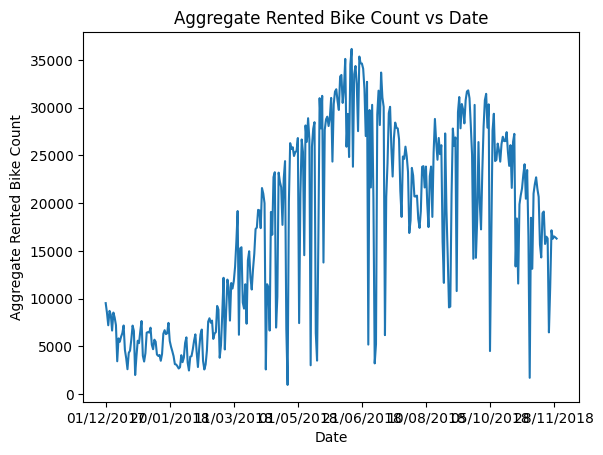

In [49]:
dailyBikeUsage.plot(kind='line')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Aggregate Rented Bike Count')
plt.title('Aggregate Rented Bike Count vs Date')

# Show the plot
plt.show()

### Graph of average bike usage by hour

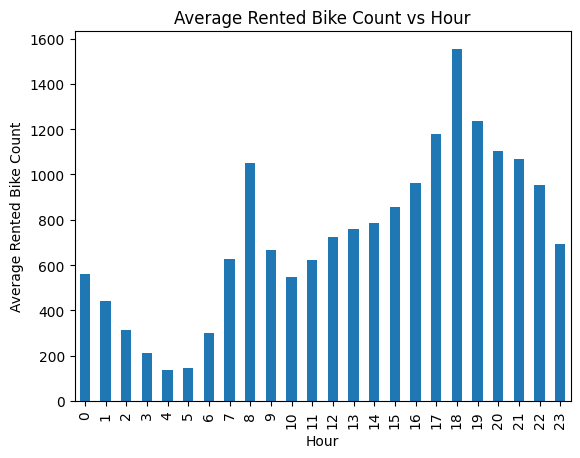

In [53]:
hourlyBikeUsage = df[df['Functioning Day'] == 'Yes'].groupby('Hour', sort=False)['Rented Bike Count'].mean()

hourlyBikeUsage.plot(kind='bar')

# Set plot labels and title
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count vs Hour')

# Show the plot
plt.show()

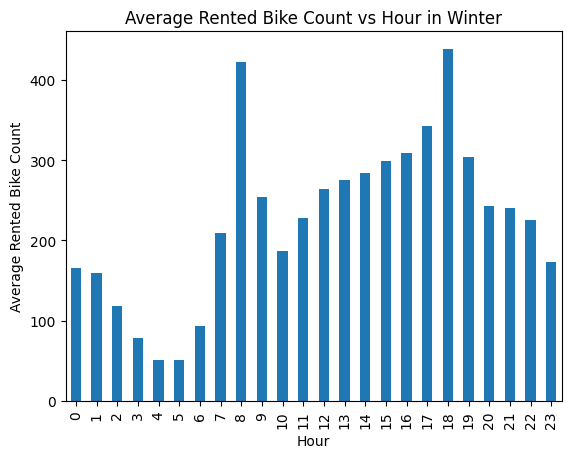

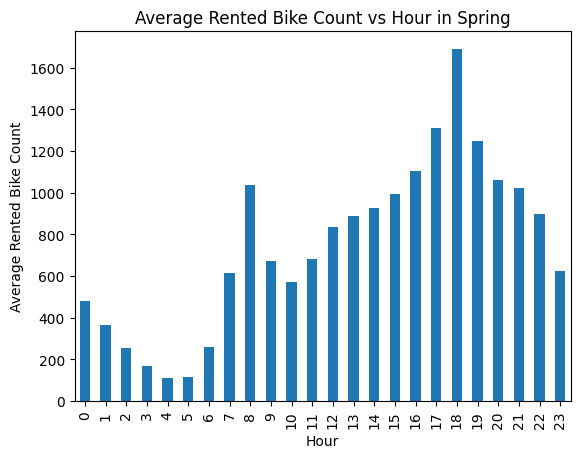

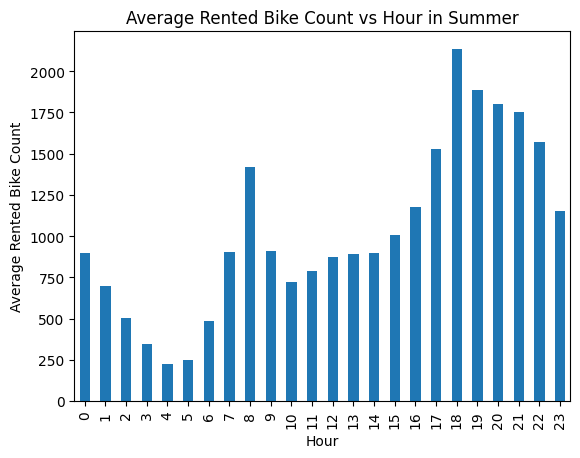

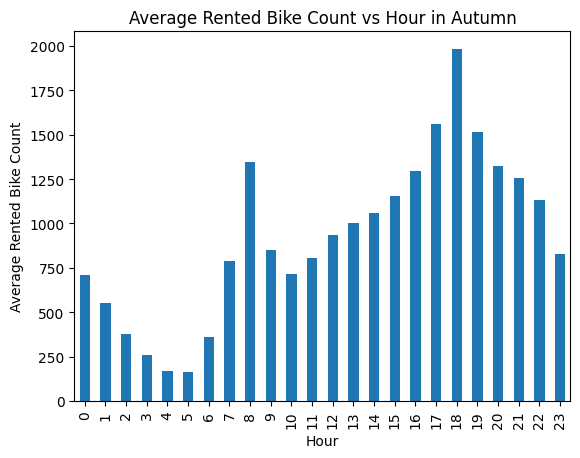

In [58]:
## takes in seasons and makes graphs
def make_graph_season(s):

  winter_hourly_usage = df[(df['Functioning Day'] == 'Yes') & (df['Seasons'] == s)].groupby('Hour', sort=False)['Rented Bike Count'].mean()

  winter_hourly_usage.plot(kind='bar')

  # Set plot labels and title
  plt.xlabel('Hour')
  plt.ylabel('Average Rented Bike Count')
  plt.title('Average Rented Bike Count vs Hour in ' + s)

  # Show the plot
  plt.show()

seasons = ["Winter", "Spring", "Summer", "Autumn"]

for seas in seasons:
  make_graph_season(seas)

### Correlation Matrix

In [62]:
# Compute the correlation matrix
non_numeric_cols = ["Date", "Holiday","Functioning Day", "Seasons"]
correlation_matrix = df[df['Functioning Day'] == "Yes"].drop(columns=non_numeric_cols).corr()
# Display the correlation matrix
print(correlation_matrix)

                           Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.425256         0.562740   
Hour                                0.425256  1.000000         0.122742   
Temperature(°C)                     0.562740  0.122742         1.000000   
Humidity(%)                        -0.201973 -0.235937         0.166425   
Wind speed (m/s)                    0.125022  0.287780        -0.038481   
Visibility (10m)                    0.212323  0.103869         0.028262   
Dew point temperature(°C)           0.400263  0.004691         0.914467   
Solar Radiation (MJ/m2)             0.273862  0.144658         0.354844   
Rainfall(mm)                       -0.128626  0.014345         0.052149   
Snowfall (cm)                      -0.151611 -0.022082        -0.217746   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.201973          0.125022          0.212323   
Hour              

In [64]:
filtered_correlations = correlation_matrix[(correlation_matrix > 0.2) | (correlation_matrix < -0.2)]

print(filtered_correlations)

                           Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.425256         0.562740   
Hour                                0.425256  1.000000              NaN   
Temperature(°C)                     0.562740       NaN         1.000000   
Humidity(%)                        -0.201973 -0.235937              NaN   
Wind speed (m/s)                         NaN  0.287780              NaN   
Visibility (10m)                    0.212323       NaN              NaN   
Dew point temperature(°C)           0.400263       NaN         0.914467   
Solar Radiation (MJ/m2)             0.273862       NaN         0.354844   
Rainfall(mm)                             NaN       NaN              NaN   
Snowfall (cm)                            NaN       NaN        -0.217746   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.201973               NaN          0.212323   
Hour              